```
// logic of https://www.youtube.com/watch?v=A6464U4bPPQ
// Facial Recognition attendance system using python

// camera module
camera module take input ...
python check
if (human face in the frame //// or not){
  compare face with the face from database

  if(present){
    // update in csv file
    // name of the student and time of entry of the student

    ///// next kaj hocche entry er pore 30 second er moddhe jodi same face dekhano hoy .. taile bolbe already counted ..

    //// and 30 second pore jodi abar same face count hoy .. taile ek din er  present complete hobe or something !
  }

}else {
  // or not

}
```

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install face_recognition

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=e2fb0bf0977b86d2c5080e2f2ca3d40944ad97e510a2455285643a26acf0e5a7
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:

!pip install opencv-python
# import opencv-python
# ----------------------------- from yt video www.youtube.com/watch?v=A6464U4bPPQ
import face_recognition as fr
import os
import cv2 # take input from the webcam, process it , give it to face ignition ..
#compare faces

import csv # handle csv file
import numpy as np

from datetime import datetime
#----------------------------- from debajyotikarmaker sir lecture
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tqdm import tqdm


# 1. take input from the webcam - YT Video

In [ ]:
video_capture = cv2.VideoCapture(0); #0 as default web cam

In [ ]:
"""
#image and corresponding encoding ...
#make an array of known face encoding ... came from db
known_face_encoding=[]

#make an array of known face names ... came from db
known_face_names=[]

face_locations = [] # face in webcame .. face co-ordinates
face_encodings = [] # the raw data
face_names = [] # the name of the face it is present in database
s = true
"""

# 2. Load All Image from DB - Sir

In [ ]:
#Data_Path = '/content/drive/MyDrive/CVPR Mohammad Sheakh Image/'
Data_Path = '/content/drive/MyDrive/ImageData'
classes = os.listdir(Data_Path) # return list of folder
print(classes)  # in this case it returns all my image
#----------------------------------------------------------------
train_data = []
for label, classes in enumerate(classes) :
  print(f"label, classes :: {label} , { classes}")
  path = os.path.join(Data_Path, classes)
  print(f"path ::  { path}")

  for singleImage in tqdm(os.listdir(path)):
    print(f"Single ImageüòÄ :: üòÄ {singleImage}") #  which will print image name
    # plt.imshow(singleImage) #üò≠
    img_arr = cv2.imread(os.path.join(path, singleImage)) # numpy array
    # plt.imshow(img_arr) # üòÄ eta kaj kore .. image show kore
    img_arr = cv2.resize(img_arr, (128, 128)) # shob gula ke ek size e ante hobe ...
    #train_data.append(img_arr)
    # ----------- we need label also /// numeric value
    train_data.append([img_arr, label]) # image er shathe label o rakhtesi

    #break
 #break
print(f"Length of train_data :: {len(train_data)}") # ------------------ this line is working üòÄüòÄüòÄüòÄüòÄüòÄ



['FAHIM RAHMAN', 'MD ABU ZAYED KHAN', 'MD NAIMUR RAHMAN', 'FAIZA BINTE ZAMAN', 'AHMED IMTIAZ', 'MD MUNTASIR AREFIN NAEEM', 'MD ATIK ULLAH KHAN', 'MD IMTIAJ ALAM SAJIN', 'ESM-E MOULA CHOWDHURY ABHA', 'MD JAHID HASSAN', 'NAHAR ISLAM NISHI', 'MD WAHIDUZZAMAN SUVA', 'MOHAMMAD NUR', 'MOHAMMAD BIN AB JALIL SHEAKH', 'MOHAMMED TANVIR HASSAN', 'MD SAJID ISLAM KHAN', 'REZWAN AHMAD', 'SYEDA HUMAIRA JABEEN', 'NAVID MAHFUZ NAYEEM', 'S M FAISAL']
label, classes :: 0 , FAHIM RAHMAN
path ::  /content/drive/MyDrive/ImageData/FAHIM RAHMAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ IMG_20240223_144918.jpg


 10%|‚ñà         | 1/10 [00:00<00:05,  1.68it/s]

Single ImageüòÄ :: üòÄ IMG_20240222_174228.jpg


 20%|‚ñà‚ñà        | 2/10 [00:01<00:05,  1.35it/s]

Single ImageüòÄ :: üòÄ IMG_20231225_193021.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:02<00:06,  1.11it/s]

Single ImageüòÄ :: üòÄ IMG_20240224_193659.jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:03<00:04,  1.27it/s]

Single ImageüòÄ :: üòÄ IMG_20240229_113742.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:03<00:03,  1.35it/s]

Single ImageüòÄ :: üòÄ IMG_20240227_121450.jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:04<00:02,  1.50it/s]

Single ImageüòÄ :: üòÄ IMG_20240227_121408.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:05<00:02,  1.36it/s]

Single ImageüòÄ :: üòÄ IMG_20240225_103232.jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:05<00:01,  1.41it/s]

Single ImageüòÄ :: üòÄ IMG_20240131_221809.jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:06<00:00,  1.38it/s]

Single ImageüòÄ :: üòÄ IMG_20240204_205230.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:07<00:00,  1.41it/s]


label, classes :: 1 , MD ABU ZAYED KHAN
path ::  /content/drive/MyDrive/ImageData/MD ABU ZAYED KHAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ a02701b2-a374-42d9-92eb-1cdc8bc2fa0b.jpg


 10%|‚ñà         | 1/10 [00:00<00:02,  3.80it/s]

Single ImageüòÄ :: üòÄ IMG_9923 (1).PNG


 20%|‚ñà‚ñà        | 2/10 [00:01<00:05,  1.35it/s]

Single ImageüòÄ :: üòÄ IMG_0737 (1).JPG


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:01<00:04,  1.55it/s]

Single ImageüòÄ :: üòÄ a02701b2-a374-42d9-92eb-1cdc8bc2fa0b (1).jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:02<00:02,  2.03it/s]

Single ImageüòÄ :: üòÄ IMG_0737.JPG


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:02<00:02,  2.19it/s]

Single ImageüòÄ :: üòÄ CB46324E-2797-4F05-98F4-2D9F3F75C34F.jpeg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:03<00:03,  1.30it/s]

Single ImageüòÄ :: üòÄ IMG_0373.JPG


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:04<00:02,  1.44it/s]

Single ImageüòÄ :: üòÄ IMG_0373 (1).JPG


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:05<00:01,  1.45it/s]

Single ImageüòÄ :: üòÄ IMG_9923.PNG


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:05<00:00,  1.39it/s]

Single ImageüòÄ :: üòÄ CB46324E-2797-4F05-98F4-2D9F3F75C34F (1).jpeg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:07<00:00,  1.42it/s]


label, classes :: 2 , MD NAIMUR RAHMAN
path ::  /content/drive/MyDrive/ImageData/MD NAIMUR RAHMAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ IMG-20221226-WA0024.jpg


 10%|‚ñà         | 1/10 [00:00<00:04,  1.95it/s]

Single ImageüòÄ :: üòÄ IMG_20240229_193158.jpg


 20%|‚ñà‚ñà        | 2/10 [00:01<00:08,  1.02s/it]

Single ImageüòÄ :: üòÄ IMG_20240114_233055_601.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:02<00:04,  1.47it/s]

Single ImageüòÄ :: üòÄ IMG_20240220_075235.jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:03<00:05,  1.09it/s]

Single ImageüòÄ :: üòÄ IMG20221006103105.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:04<00:04,  1.02it/s]

Single ImageüòÄ :: üòÄ IMG_20230714_124049.jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:05<00:04,  1.04s/it]

Single ImageüòÄ :: üòÄ IMG_20240114_233103_379.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:06<00:02,  1.25it/s]

Single ImageüòÄ :: üòÄ IMG_20240203_224902.jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:06<00:01,  1.19it/s]

Single ImageüòÄ :: üòÄ IMG_20240227_184155.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:08<00:00,  1.22it/s]


Single ImageüòÄ :: üòÄ IMG_20240114_233030_631.jpg
label, classes :: 3 , FAIZA BINTE ZAMAN
path ::  /content/drive/MyDrive/ImageData/FAIZA BINTE ZAMAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ 7.jpg


 10%|‚ñà         | 1/10 [00:00<00:01,  5.97it/s]

Single ImageüòÄ :: üòÄ 1.jpg


 20%|‚ñà‚ñà        | 2/10 [00:00<00:03,  2.52it/s]

Single ImageüòÄ :: üòÄ 9.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:00<00:02,  3.15it/s]

Single ImageüòÄ :: üòÄ 8.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:01<00:01,  3.63it/s]

Single ImageüòÄ :: üòÄ 4.jpg
Single ImageüòÄ :: üòÄ 5.jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:02<00:01,  2.69it/s]

Single ImageüòÄ :: üòÄ 2.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:02<00:01,  2.74it/s]

Single ImageüòÄ :: üòÄ 6.jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:02<00:00,  3.13it/s]

Single ImageüòÄ :: üòÄ 3.jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:03<00:00,  2.67it/s]

Single ImageüòÄ :: üòÄ 10.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:03<00:00,  2.90it/s]


label, classes :: 4 , AHMED IMTIAZ
path ::  /content/drive/MyDrive/ImageData/AHMED IMTIAZ


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ 20230210_131638.jpg


 10%|‚ñà         | 1/10 [00:00<00:03,  2.32it/s]

Single ImageüòÄ :: üòÄ 20231221_003902.jpg


 20%|‚ñà‚ñà        | 2/10 [00:00<00:02,  3.17it/s]

Single ImageüòÄ :: üòÄ 20210902_124624-removebg-preview (1).png


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:01<00:01,  3.66it/s]

Single ImageüòÄ :: üòÄ 20220308_213811.jpg
Single ImageüòÄ :: üòÄ IMG-20221205-WA0001.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:01<00:01,  4.38it/s]

Single ImageüòÄ :: üòÄ 20220503_140745.jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:01<00:00,  4.17it/s]

Single ImageüòÄ :: üòÄ Screenshot_20240301_013246_Gallery.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:01<00:00,  3.70it/s]

Single ImageüòÄ :: üòÄ 20220713_183853.jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:02<00:00,  3.32it/s]

Single ImageüòÄ :: üòÄ 20210925_145847.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  3.47it/s]


Single ImageüòÄ :: üòÄ Screenshot_20240301_014252_Facebook.jpg
label, classes :: 5 , MD MUNTASIR AREFIN NAEEM
path ::  /content/drive/MyDrive/ImageData/MD MUNTASIR AREFIN NAEEM


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ 287792461_3294601764118574_2685753382961838690_n.jpg


 10%|‚ñà         | 1/10 [00:00<00:01,  5.27it/s]

Single ImageüòÄ :: üòÄ 320056383_619291839883564_7048028013685894693_n.jpg


 20%|‚ñà‚ñà        | 2/10 [00:00<00:02,  3.64it/s]

Single ImageüòÄ :: üòÄ 316532240_3431892013722881_2077473884973127951_n.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:00<00:01,  3.93it/s]

Single ImageüòÄ :: üòÄ 381568396_3647041298874617_3628283613424837706_n.jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:01<00:01,  3.74it/s]

Single ImageüòÄ :: üòÄ 191260090_3011774392401314_1443206442181469142_n.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:01<00:01,  3.13it/s]

Single ImageüòÄ :: üòÄ 340248401_1271009723794957_7564881402209886361_n.jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:01<00:01,  3.28it/s]

Single ImageüòÄ :: üòÄ 299485514_3342800692632014_4080214702969970904_n.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:02<00:00,  3.40it/s]

Single ImageüòÄ :: üòÄ 342571102_952218046195260_6337199552230526425_n.jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:02<00:00,  2.74it/s]

Single ImageüòÄ :: üòÄ 329365445_688972973022018_4580179416236588095_n.jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:02<00:00,  2.70it/s]

Single ImageüòÄ :: üòÄ 365090080_3612249159020498_1400036575724407234_n (1).jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:03<00:00,  3.01it/s]


label, classes :: 6 , MD ATIK ULLAH KHAN
path ::  /content/drive/MyDrive/ImageData/MD ATIK ULLAH KHAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ IMG_2798.jpg


 10%|‚ñà         | 1/10 [00:00<00:03,  2.89it/s]

Single ImageüòÄ :: üòÄ IMG_20230525_212237.jpg


 20%|‚ñà‚ñà        | 2/10 [00:00<00:04,  1.91it/s]

Single ImageüòÄ :: üòÄ IMG_20230527_122903.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:01<00:05,  1.38it/s]

Single ImageüòÄ :: üòÄ 20230314_210734.jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:02<00:03,  1.77it/s]

Single ImageüòÄ :: üòÄ IMG_0560.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:02<00:02,  1.82it/s]

Single ImageüòÄ :: üòÄ 0.jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:03<00:01,  2.09it/s]

Single ImageüòÄ :: üòÄ IMG_2553.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:03<00:01,  2.16it/s]

Single ImageüòÄ :: üòÄ 20230912_121310.jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:03<00:00,  2.39it/s]

Single ImageüòÄ :: üòÄ 20231017_160631.jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:04<00:00,  2.64it/s]

Single ImageüòÄ :: üòÄ IMG_20231006_132647.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:04<00:00,  2.15it/s]


label, classes :: 7 , MD IMTIAJ ALAM SAJIN
path ::  /content/drive/MyDrive/ImageData/MD IMTIAJ ALAM SAJIN


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ PXL_20231111_115748455.NIGHTk.jpg


 10%|‚ñà         | 1/10 [00:00<00:04,  1.99it/s]

Single ImageüòÄ :: üòÄ 20220331083833_IMG_1004.JPG


 20%|‚ñà‚ñà        | 2/10 [00:00<00:03,  2.38it/s]

Single ImageüòÄ :: üòÄ IMG20210316190341.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:01<00:02,  3.08it/s]

Single ImageüòÄ :: üòÄ op_kop.JPG


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:01<00:02,  2.57it/s]

Single ImageüòÄ :: üòÄ PXL_20231201_145545371.PORTRAIT.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:01<00:01,  2.81it/s]

Single ImageüòÄ :: üòÄ PXL_20240203_133743070.PORTlRAIT.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:02<00:00,  3.73it/s]

Single ImageüòÄ :: üòÄ PXL_20240126_122806567.jpg
Single ImageüòÄ :: üòÄ 20221020055447_IMG_8419f - Copy.JPG


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:02<00:00,  3.43it/s]

Single ImageüòÄ :: üòÄ PXL_20240203_103720507.jpg
Single ImageüòÄ :: üòÄ PXL_20231216_144717661.PORTRAIT.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:03<00:00,  2.96it/s]


label, classes :: 8 , ESM-E MOULA CHOWDHURY ABHA
path ::  /content/drive/MyDrive/ImageData/ESM-E MOULA CHOWDHURY ABHA


 10%|‚ñà         | 1/10 [00:00<00:01,  7.27it/s]

Single ImageüòÄ :: üòÄ IMG-20240223-WA0014.jpg
Single ImageüòÄ :: üòÄ IMG-20240223-WA0008.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:00<00:01,  6.94it/s]

Single ImageüòÄ :: üòÄ IMG-20240223-WA0024.jpg
Single ImageüòÄ :: üòÄ IMG-20240223-WA0026.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:00<00:00,  6.56it/s]

Single ImageüòÄ :: üòÄ IMG-20240223-WA0023.jpg
Single ImageüòÄ :: üòÄ IMG-20240223-WA0029.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:01<00:00,  6.57it/s]

Single ImageüòÄ :: üòÄ IMG-20240223-WA0028.jpg
Single ImageüòÄ :: üòÄ IMG-20240223-WA0019.jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:01<00:00,  6.77it/s]

Single ImageüòÄ :: üòÄ IMG-20240223-WA0022.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:01<00:00,  6.42it/s]


Single ImageüòÄ :: üòÄ IMG-20240223-WA0025.jpg
label, classes :: 9 , MD JAHID HASSAN
path ::  /content/drive/MyDrive/ImageData/MD JAHID HASSAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ Jahid(4).jpg


 10%|‚ñà         | 1/10 [00:00<00:01,  5.11it/s]

Single ImageüòÄ :: üòÄ Jahid(2).jpg


 20%|‚ñà‚ñà        | 2/10 [00:00<00:01,  5.72it/s]

Single ImageüòÄ :: üòÄ Jahid(8).jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:00<00:01,  5.08it/s]

Single ImageüòÄ :: üòÄ Jahid(3).jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:00<00:01,  4.96it/s]

Single ImageüòÄ :: üòÄ Jahid(7).jpg
Single ImageüòÄ :: üòÄ Jahid.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:01<00:00,  5.86it/s]

Single ImageüòÄ :: üòÄ Jahid(5).jpg
Single ImageüòÄ :: üòÄ Jahid(9).jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:01<00:00,  6.01it/s]

Single ImageüòÄ :: üòÄ Jahid(1).jpg
Single ImageüòÄ :: üòÄ Jahid(6).jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:01<00:00,  5.58it/s]


label, classes :: 10 , NAHAR ISLAM NISHI
path ::  /content/drive/MyDrive/ImageData/NAHAR ISLAM NISHI


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ photo_12_2024-03-01_14-05-10.jpg


 20%|‚ñà‚ñà        | 2/10 [00:00<00:01,  5.10it/s]

Single ImageüòÄ :: üòÄ photo_3_2024-03-01_16-40-30.jpg
Single ImageüòÄ :: üòÄ photo_8_2024-03-01_14-05-10.jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:00<00:01,  5.21it/s]

Single ImageüòÄ :: üòÄ photo_1_2024-03-01_16-40-30.jpg
Single ImageüòÄ :: üòÄ photo_14_2024-03-01_14-05-10.jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:01<00:00,  5.47it/s]

Single ImageüòÄ :: üòÄ photo_11_2024-03-01_14-05-10.jpg
Single ImageüòÄ :: üòÄ photo_1_2024-03-01_14-05-10.jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:01<00:00,  5.24it/s]

Single ImageüòÄ :: üòÄ photo_5_2024-03-01_14-05-10.jpg
Single ImageüòÄ :: üòÄ photo_7_2024-03-01_14-05-10.jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:01<00:00,  5.39it/s]

Single ImageüòÄ :: üòÄ photo_10_2024-03-01_14-05-10.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:01<00:00,  5.18it/s]


label, classes :: 11 , MD WAHIDUZZAMAN SUVA
path ::  /content/drive/MyDrive/ImageData/MD WAHIDUZZAMAN SUVA


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ 20210801_115829.jpg


 10%|‚ñà         | 1/10 [00:00<00:05,  1.74it/s]

Single ImageüòÄ :: üòÄ 20210508_131238.jpg


 20%|‚ñà‚ñà        | 2/10 [00:01<00:05,  1.53it/s]

Single ImageüòÄ :: üòÄ 20210810_130108.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:01<00:03,  1.90it/s]

Single ImageüòÄ :: üòÄ 20210806_165628.jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:02<00:03,  1.97it/s]

Single ImageüòÄ :: üòÄ 20210806_170750.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:02<00:02,  2.09it/s]

Single ImageüòÄ :: üòÄ 20211007_123821.jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:02<00:01,  2.22it/s]

Single ImageüòÄ :: üòÄ 20210616_180711.jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:03<00:00,  3.28it/s]

Single ImageüòÄ :: üòÄ 20210116_103021.jpg
Single ImageüòÄ :: üòÄ 20210508_131238(1).jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:03<00:00,  2.67it/s]

Single ImageüòÄ :: üòÄ 20211122_185753.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:04<00:00,  2.20it/s]


label, classes :: 12 , MOHAMMAD NUR
path ::  /content/drive/MyDrive/ImageData/MOHAMMAD NUR


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ 1705695655412.jpg


 10%|‚ñà         | 1/10 [00:00<00:03,  2.54it/s]

Single ImageüòÄ :: üòÄ 1694425060305.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:00<00:01,  3.97it/s]

Single ImageüòÄ :: üòÄ 1705695655149.jpg
Single ImageüòÄ :: üòÄ IMG_0522.jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:01<00:01,  3.17it/s]

Single ImageüòÄ :: üòÄ IMG_20230725_194243.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:01<00:01,  3.52it/s]

Single ImageüòÄ :: üòÄ IMG_20231211_085319.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:02<00:00,  3.27it/s]

Single ImageüòÄ :: üòÄ IMG_4816.jpg
Single ImageüòÄ :: üòÄ IMG_20231122_233310_618-EDIT (1).jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:02<00:00,  3.53it/s]

Single ImageüòÄ :: üòÄ IMG_20230107_204536.jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:02<00:00,  3.02it/s]

Single ImageüòÄ :: üòÄ IMG_20231214_164006.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:03<00:00,  2.89it/s]


label, classes :: 13 , MOHAMMAD BIN AB JALIL SHEAKH
path ::  /content/drive/MyDrive/ImageData/MOHAMMAD BIN AB JALIL SHEAKH


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ Mohammad.jpg


 10%|‚ñà         | 1/10 [00:00<00:03,  2.63it/s]

Single ImageüòÄ :: üòÄ Mohammad(3).jpg


 20%|‚ñà‚ñà        | 2/10 [00:01<00:05,  1.44it/s]

Single ImageüòÄ :: üòÄ Mohammad(1).jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:02<00:03,  1.60it/s]

Single ImageüòÄ :: üòÄ Mohammad(5).jpg
Single ImageüòÄ :: üòÄ Mohammad(4).jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:03<00:04,  1.18it/s]

Single ImageüòÄ :: üòÄ Mohammad(8).jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:05<00:03,  1.03it/s]

Single ImageüòÄ :: üòÄ Mohammad(7).jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:05<00:01,  1.79it/s]

Single ImageüòÄ :: üòÄ Mohammad(9).jpg
Single ImageüòÄ :: üòÄ Mohammad(2).jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:06<00:00,  1.47it/s]

Single ImageüòÄ :: üòÄ Mohammad(6).jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:07<00:00,  1.34it/s]


label, classes :: 14 , MOHAMMED TANVIR HASSAN
path ::  /content/drive/MyDrive/ImageData/MOHAMMED TANVIR HASSAN


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ IMG_20210204.jpg


 10%|‚ñà         | 1/10 [00:00<00:05,  1.69it/s]

Single ImageüòÄ :: üòÄ IMG_5976.JPG


 20%|‚ñà‚ñà        | 2/10 [00:01<00:04,  1.90it/s]

Single ImageüòÄ :: üòÄ IMG_2204.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:01<00:03,  1.99it/s]

Single ImageüòÄ :: üòÄ IMG_2021.jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:02<00:03,  1.62it/s]

Single ImageüòÄ :: üòÄ IMG_4090.JPG


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:02<00:03,  1.62it/s]

Single ImageüòÄ :: üòÄ IMG_25847.jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:03<00:02,  1.97it/s]

Single ImageüòÄ :: üòÄ IMG_2015854.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:03<00:01,  1.89it/s]

Single ImageüòÄ :: üòÄ IMG_7089.JPG


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:04<00:01,  1.65it/s]

Single ImageüòÄ :: üòÄ IMG_20204.jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:05<00:00,  1.69it/s]

Single ImageüòÄ :: üòÄ IMG_9978.JPG


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:05<00:00,  1.79it/s]


label, classes :: 15 , MD SAJID ISLAM KHAN
path ::  /content/drive/MyDrive/ImageData/MD SAJID ISLAM KHAN


 10%|‚ñà         | 1/10 [00:00<00:01,  5.47it/s]

Single ImageüòÄ :: üòÄ photo_2024-02-29_18-43-27.jpg
Single ImageüòÄ :: üòÄ photo_2024-02-29_18-45-24 (2).jpg


 20%|‚ñà‚ñà        | 2/10 [00:00<00:01,  5.42it/s]

Single ImageüòÄ :: üòÄ photo_2024-02-29_18-43-27 (3).jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:00<00:01,  3.73it/s]

Single ImageüòÄ :: üòÄ photo_2024-02-29_18-43-27 (4).jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:01<00:01,  3.57it/s]

Single ImageüòÄ :: üòÄ photo_2024-02-29_18-45-24 (4).jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:01<00:01,  3.53it/s]

Single ImageüòÄ :: üòÄ photo_2024-02-29_18-43-27 (5).jpg
Single ImageüòÄ :: üòÄ photo_2024-02-29_18-43-27 (6).jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:02<00:00,  4.19it/s]

Single ImageüòÄ :: üòÄ photo_2024-02-29_18-45-24.jpg
Single ImageüòÄ :: üòÄ photo_2024-02-29_18-43-27 (2).jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  4.15it/s]


Single ImageüòÄ :: üòÄ photo_2024-02-29_18-45-24 (3).jpg
label, classes :: 16 , REZWAN AHMAD
path ::  /content/drive/MyDrive/ImageData/REZWAN AHMAD


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ Rezwan(3).jpg


 20%|‚ñà‚ñà        | 2/10 [00:00<00:01,  4.50it/s]

Single ImageüòÄ :: üòÄ Rezwan(8).jpg
Single ImageüòÄ :: üòÄ Rezwan(7).jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:00<00:01,  3.88it/s]

Single ImageüòÄ :: üòÄ Rezwan(1).jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:01<00:01,  3.37it/s]

Single ImageüòÄ :: üòÄ Rezwan(2).jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:01<00:01,  3.32it/s]

Single ImageüòÄ :: üòÄ Rezwan(4).jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:01<00:00,  3.75it/s]

Single ImageüòÄ :: üòÄ Rezwan.jpg
Single ImageüòÄ :: üòÄ Rezwan(5).jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:02<00:00,  3.44it/s]

Single ImageüòÄ :: üòÄ Rezwan(9).jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:02<00:00,  3.48it/s]

Single ImageüòÄ :: üòÄ Rezwan(6).jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  3.53it/s]


label, classes :: 17 , SYEDA HUMAIRA JABEEN
path ::  /content/drive/MyDrive/ImageData/SYEDA HUMAIRA JABEEN


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ IMG-20230127-WA0045.jpg


 20%|‚ñà‚ñà        | 2/10 [00:00<00:01,  4.18it/s]

Single ImageüòÄ :: üòÄ Snapchat-477145335.jpg
Single ImageüòÄ :: üòÄ IMG_20240213_091551_458.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:00<00:01,  4.18it/s]

Single ImageüòÄ :: üòÄ Snapchat-32699592.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:01<00:01,  4.18it/s]

Single ImageüòÄ :: üòÄ Snapchat-2032754434.jpg
Single ImageüòÄ :: üòÄ IMG-20230425-WA0071.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:01<00:00,  4.71it/s]

Single ImageüòÄ :: üòÄ IMG-20230127-WA0045 (1).jpg
Single ImageüòÄ :: üòÄ received_998970354415575.jpeg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:02<00:00,  3.69it/s]

Single ImageüòÄ :: üòÄ IMG_20240213_091551_458 (1).jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:02<00:00,  3.98it/s]

Single ImageüòÄ :: üòÄ Snapchat-1929729646.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  3.85it/s]


label, classes :: 18 , NAVID MAHFUZ NAYEEM
path ::  /content/drive/MyDrive/ImageData/NAVID MAHFUZ NAYEEM


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ 20240301_143223.jpg


 10%|‚ñà         | 1/10 [00:00<00:05,  1.50it/s]

Single ImageüòÄ :: üòÄ 20240301_143250.jpg


 20%|‚ñà‚ñà        | 2/10 [00:01<00:05,  1.50it/s]

Single ImageüòÄ :: üòÄ 20240301_143236.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:02<00:06,  1.16it/s]

Single ImageüòÄ :: üòÄ 20240301_143203.jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:03<00:05,  1.19it/s]

Single ImageüòÄ :: üòÄ 20240301_143257.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:04<00:04,  1.18it/s]

Single ImageüòÄ :: üòÄ 20240301_143359.jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:04<00:03,  1.32it/s]

Single ImageüòÄ :: üòÄ 20240301_143357.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:05<00:02,  1.27it/s]

Single ImageüòÄ :: üòÄ 20240301_143213.jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:06<00:01,  1.24it/s]

Single ImageüòÄ :: üòÄ 20240301_143346.jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:06<00:00,  1.36it/s]

Single ImageüòÄ :: üòÄ 20240301_143350.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:07<00:00,  1.26it/s]


label, classes :: 19 , S M FAISAL
path ::  /content/drive/MyDrive/ImageData/S M FAISAL


  0%|          | 0/10 [00:00<?, ?it/s]

Single ImageüòÄ :: üòÄ 7.jpg


 10%|‚ñà         | 1/10 [00:01<00:11,  1.30s/it]

Single ImageüòÄ :: üòÄ 10.jpg


 20%|‚ñà‚ñà        | 2/10 [00:02<00:11,  1.38s/it]

Single ImageüòÄ :: üòÄ 4.jpg


 30%|‚ñà‚ñà‚ñà       | 3/10 [00:03<00:06,  1.10it/s]

Single ImageüòÄ :: üòÄ 1.jpg


 40%|‚ñà‚ñà‚ñà‚ñà      | 4/10 [00:03<00:04,  1.31it/s]

Single ImageüòÄ :: üòÄ 6.jpg


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 5/10 [00:04<00:03,  1.29it/s]

Single ImageüòÄ :: üòÄ 9.jpg


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 6/10 [00:05<00:03,  1.16it/s]

Single ImageüòÄ :: üòÄ 8.jpg


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 7/10 [00:06<00:02,  1.25it/s]

Single ImageüòÄ :: üòÄ 3.jpg


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 8/10 [00:07<00:01,  1.12it/s]

Single ImageüòÄ :: üòÄ 2.jpg


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 9/10 [00:07<00:00,  1.22it/s]

Single ImageüòÄ :: üòÄ 5.jpg


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:08<00:00,  1.14it/s]

Length of train_data :: 200


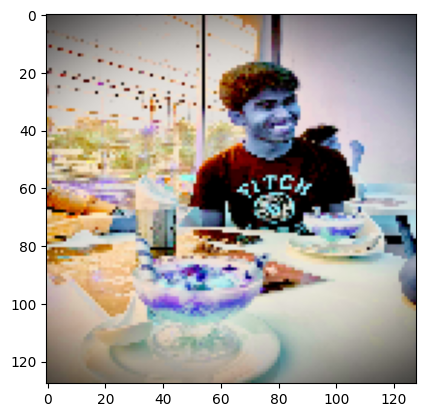

In [ ]:
plt.imshow(train_data[12][0]) # dataset read korar jonno  [0][1]

Text(0.5, 0, 'S')

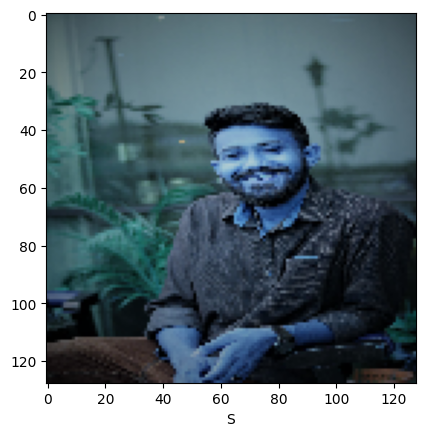

In [ ]:
plt.imshow(train_data[19][0]) #------ üò≠ [0 to 19][0] ei porjonto e chobi print hoy .. architecture ta bujhi nai üò≠
plt.xlabel(classes[train_data[0][1]]) # --- üò≠ label thik moto print hocche na
#--plt.xlabel(train_data[0][1])

In [ ]:
for i in range(39):
  print(train_data[i][1])  # 0 gula mohammad , 1 gula fahim rahman

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3


# Data ke shuffle korte hobe  - Sir

In [ ]:
random.shuffle(train_data)
print(f"print-> train_data after shuffle : {train_data[0][1]}")
#train_data[1][1]

#-------------------- tensor object / numpy array diye feed korte hobe
#--------------------- image ar label alada korbo
train_imgs = []
train_labels = [] # duita empty array niye nilam

for img, label in train_data :
  train_imgs.append(img)
  train_labels.append(label)


#------------------ normal list theke numpy te convert korbo

train_imgs_np = np.array(train_imgs)
train_labels_np = np.array(train_labels)

#-- lets print the dymention
print(f"print-> train_imgs_np.shape , train_labels_np.shape :: {train_imgs_np.shape} , {train_labels_np.shape}")



print-> train_data after shuffle : 18
print-> train_imgs_np.shape , train_labels_np.shape :: (200, 128, 128, 3) , (200,)


# ‡¶è‡¶¨‡¶æ‡¶∞ ‡¶Ü‡¶Æ‡¶∞‡¶æ CNN ‡¶¶‡ßá‡¶ñ‡¶¨‡ßã ... ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶ï‡ßç‡¶∞‡¶ø‡ßü‡ßá‡¶ü ‡¶ï‡¶∞‡¶¨‡ßã - Sir

In [40]:
# üéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâ CURRENTLY WORKING IN THIS PORTIONüéâüéâüéâüéâüéâüéâüéâüéâüéâ
model = tf.keras.Sequential(
    [
        tf.keras.Input (shape=(128, 128, 3)), # // input bolte hobe .. 3 hocche depth which also means color image Bcz RGB
        # ekhon kichu hidden layer amader ke bolte hobe

        # tf.keras.layers.Conv2D(
        #       filters = 512, # // koto gula filter amra use korbo
        #       kernel_size = (5,5),  # // kernel_size .. filter er dymention
        #       activation = 'sigmoid',
        #       padding = 'same'  # // tensorflow nije calculate korbe .. koto tuku padding dite hobe
        #     ),

        # tf.keras.layers.Conv2D(
        #       filters = 128, # // koto gula filter amra use korbo
        #       kernel_size = (5,5),  # // kernel_size .. filter er dymention
        #       activation = 'relu',
        #       padding = 'same'
        #     ),

        tf.keras.layers.Conv2D(
              filters = 64, # // koto gula filter amra use korbo
              kernel_size = (5,5),  # // kernel_size .. filter er dymention
              activation = 'sigmoid',
              padding = 'same'
            ),

        tf.keras.layers.Conv2D(
              filters = 32, # // koto gula filter amra use korbo
              kernel_size = (3,3),  # // kernel_size .. filter er dymention
              activation = 'sigmoid',

            ),

        # tf.keras.layers.Conv2D(
        #       filters = 16,
        #       kernel_size = (3,3),
        #       activation = 'sigmoid',
        #     ),

      # dymention ‡¶ï‡ßá ‡¶õ‡ßã‡¶ü ‡¶ï‡¶∞‡¶§‡ßá ‡¶ö‡¶æ‡¶á‡¶≤‡ßá
       tf.keras.layers.MaxPooling2D(pool_size = (2,2)), # --------------- üò≠üò≠üò≠ issue
      #tf.keras.layers.Dense(unit = 3, activation='softmax'),  # --------------- üò≠üò≠üò≠ issue

      # ‡¶®‡ßá‡¶ü‡¶ì‡ßü‡¶æ‡¶∞‡¶ï ‡¶è‡¶∞ ‡¶Ü‡¶â‡¶ü‡¶™‡ßÅ‡¶ü ‡¶è‡¶∞  ‡¶Ü‡¶ó‡ßá ‡¶Æ‡ßá‡¶ü‡ßç‡¶∞‡¶ø‡¶ï‡ßç‡¶∏ ‡¶ï‡ßá ‡¶≠‡ßá‡¶ï‡ßç‡¶ü‡¶∞ ‡¶è ‡¶ï‡¶®‡¶≠‡¶æ‡¶∞‡ßç‡¶ü ‡¶ï‡¶∞‡¶§‡ßá ‡¶π‡¶¨‡ßá

      tf.keras.layers.Flatten()

      # ‡¶ï‡¶§ ‡¶®‡¶æ‡¶Æ‡ßç‡¶¨‡¶æ‡¶∞ ‡¶Ö‡¶´ ‡¶™‡ßç‡¶Ø‡¶æ‡¶∞‡¶æ‡¶Æ‡¶ø‡¶ü‡¶æ‡¶∞  ‡¶ï‡¶Æ‡ßá



    ]
)

model.summary() # // model ta kemon holo dekhte chai

model.compile(
    optimizer = 'adam', #adam,
    loss = 'sparse_categorical_crossentropy', #Categorical Crossentropy   sparse_categorical_crossentropy
    metrics = ['accuracy']
)

# ‡¶≤‡ßá‡¶ü‡¶∏ ‡¶ü‡ßç‡¶∞‡ßá‡¶á‡¶® ‡¶¶‡ßç‡¶Ø‡¶æ ‡¶Æ‡¶°‡ßá‡¶≤
h = model.fit(
    x = train_imgs_np,
    y = train_labels_np,
    epochs = 100,
    validation_split = 0.2, # 20% chobi validation er jonno use korbe ..
    batch_size = 25 # ek bar e 5 ta kore chobi niye kaj korbe
)




Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 128, 128, 64)      4864      
                                                                 
 conv2d_47 (Conv2D)          (None, 126, 126, 32)      18464     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_19 (Flatten)        (None, 127008)            0         
                                                                 
Total params: 23328 (91.12 KB)
Trainable params: 23328 (91.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 2s 158ms/step - loss: 11.5419 - 

# Plot Graph Based On Accuracy And Loss

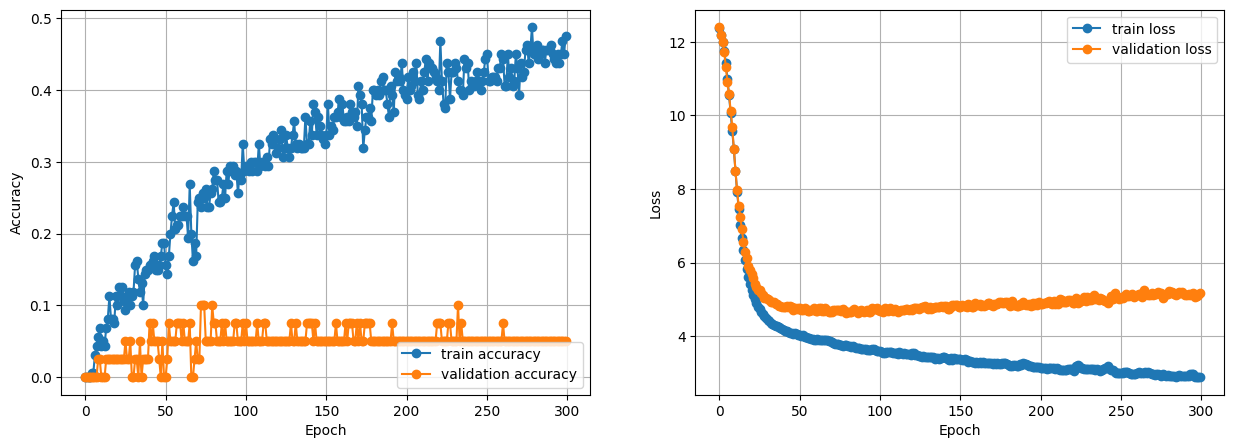

In [ ]:
# .. üéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâ CURRENTLY WORKING IN THIS PORTIONüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâüéâ
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Testing Should be done with Open CV

In [ ]:
# predictions = model.predict(train_data[19][0])
# np.argmax(predictions[0])

# Open a CSV file and create a writer object class - YT Video

In [ ]:
# before that consider date time year
now = datetime.now()
current_date = now.strftime("%Y-%m-%d")

csvFile = open(current_date + '.csv', 'w+', newline = '')
lnwrite = csv.writer(csvFile) # lnwrite is the instance .. we will use this to write the data in CSV file


# 1.1

In [ ]:
while True :  # infinite loop to open camera
  _ , frame = video_capture.read() # extracting the video data // return signal , actual video input
  small_frame = cv2.resize(frame, (0,0), fx = 0.25, fy = 0.25 ) # decreasing the size of video coming from webcam
  rgb_small_frame = small_frame[:, :, ::-1] # converting to RGB as CV2 takes the input as BGR  format
  if True: # which is 's' in YT video
    face_locations = face_recognition.face_locations(rgb_small_frame)
    face_encodings = face_recognition.face_encodings(rgb_small_grame, face_locations)
    face_names = []
    for face_encoding in face_encodings:
      # here we do the compare stuffs
      break
    break


# Google Colab : Accss Webcam for Images and Video

In [ ]:
from tensorflow import keras

In [ ]:
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

num_classes = 20


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N